 ## Classical Random Walks
 In a classical random walk, a particle or walker moves on a graph, where the nodes represent possible states and the edges represent the possible transitions between states. The walker moves from one vertex to another based on a set of probabilities. A common example is a simple symmetric random walk on a regular graph, where each edge has an equal probability of being chosen.

The state of the walker is described by a probability distribution $𝑝$ over the vertices of the graph. If the graph has $|V|$ vertices, then the transition matrix $M$ governs the evolution of the walk. For a vertex $k$, $deg(k)$ denotes the degree, or the number of edges connected to $k$. The matrix $M$ is defined by: $$\begin{cases} 1/{{deg}(k)} & (j, k) \in E \\
0 & \text{otherwise}
\end{cases}$$
where $E$ is the set of edges. This matrix describes the probability of transitioning from vertex $k$ to vertex $j$ in one step. After one step, the probability distribution $p$ evolves to $p'$ given by: $p' = M p $

##  Quantum Random Walks
Quantum random walks are the quantum analog of classical random walks, but they differ in significant ways due to the principles of quantum mechanics. In a quantum random walk, the state of the walker is represented by a quantum state, which is a superposition of the vertices of the graph. This allows for interference effects, where the probability amplitude can cancel or reinforce itself.
A quantum random walk on a graph is characterized by a unitary operator $ U $ that evolves the state of the system. The challenge is to define $ U $ in a way that generalizes the classical transition matrix $ M $ while maintaining unitarity. 
For a vertex $ j $, we aim for the walker to evolve to a superposition of its neighbors. This evolution is defined as:

$$|j\rangle \mapsto |\partial j\rangle := \frac{1}{\sqrt{{deg}(j)}} \sum_{k: (j,k) \in E} |k\rangle $$

Here, $|j\rangle $ represents the quantum state corresponding to vertex $ j $, and $ |\partial j\rangle $ is the superposition of the neighbors of $ j $, normalized by the square root of the degree of $ j $.

In retrospect nonetheless, though intuitive, the above definition doesn’t always define a unitary transformation becuase adjacent vertices $j$ and $k$ with a common neighbor evolve to non-orthogonal states, violating unitarity.

Introducing relative phases could potentially address this.

For example, consider a simple graph with two vertices, labeled as $j$ and $k$, connected by an edge. The adjacency matrix $A$ for this graph is: $ A = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$

Now, let’s define the unitary operator (U) as:

$ U = \frac{1}{\sqrt{{deg}(j)}} e^{i\phi_{jk}} |k\rangle\langle j| + \frac{1}{\sqrt{{deg}(k)}} e^{i\phi_{kj}} |j\rangle\langle k| $

where $\phi_{jk}$ and $\phi_{kj}$ are the phases associated with the edge connecting vertices $j$ and $k$.

Let’s start with the initial state $|j\rangle)$.
Applying the unitary operator (U), we get: $ U |j\rangle = \frac{1}{\sqrt{{deg}(j)}} e^{i\phi_{jk}} |k\rangle + \frac{1}{\sqrt{{deg}(k)}} e^{i\phi_{kj}} |j\rangle $
To ensure orthogonality, we need: $ \langle j | U^\dagger U | j \rangle = 1 $ This condition gives us: $ e^{i(\phi_{jk} - \phi_{kj})} = 1 $ which implies $\phi_{jk} = \phi_{kj}$.
Now, let’s consider the evolution of the state $|k\rangle$: $ U |k\rangle = \frac{1}{\sqrt{\text{deg}(j)}} e^{i\phi_{jk}} |j\rangle + \frac{1}{\sqrt{\text{deg}(k)}} e^{i\phi_{kj}} |k\rangle $ We want this to be consistent with the behavior at vertex $j$. For uniformity, we need: $ e^{i(\phi_{jk} - \phi_{kj})} = 1 $ which again implies $\phi_{jk} = \phi_{kj}$

So, introducing phases helps maintain orthogonality, but ensuring uniform behavior across all vertices requires careful phase choices! The challenge lies in finding a consistent set of phases $\phi_{jk}$ that respects the graph structure and maintains unitarity.

Also, some graphs inherently prevent local unitary dynamics due to their structure. For instance, consider a graph with a vertex that has only one neighbor. In this case, the unitary transformation cannot be local because the neighboring vertex’s state directly influences the central vertex. Certain graphs exhibit such symmetries that restrict the possibility of local unitary dynamics.

We can be nifty about this and do something that could potentially address these challenges: enlarge our Hilbert Space by introducing an auxiliary degree of freedom. Now our enlarged Hilbert space is spanned by $|j\rangle$, $|k\rangle$, and $|a\rangle$.

We define the following mapping: $|j\rangle \mapsto |j\rangle \otimes |a\rangle $ and $ |k\rangle \mapsto |k\rangle \otimes |a\rangle $
In this extended space, the unitary operator acts as follows: $$ U |j\rangle \otimes |a\rangle = \frac{1}{\sqrt{\text{deg}(j)}} e^{i\phi_{jk}} |k\rangle \otimes |a\rangle + \frac{1}{\sqrt{\text{deg}(k)}} e^{i\phi_{kj}} |j\rangle \otimes |a\rangle $$
We have now ensured that the resulting states remain orthogonal, and effectively embedded the graph structure into a larger space where unitary transformations are well-defined. That concludes our example. 

### Discrete-Time Quantum Walks

In discrete-time quantum walks, the evolution of the walk is defined in discrete steps, unlike in continuous-time quantum walks where the evolution is described by a continuous-time unitary operator. Discrete-time quantum walks introduce an additional register, often called the "*coin*" register, to control the direction of the walk.

The evolution operator for a discrete-time quantum walk is typically composed of two parts:

1. **Coin Operator $( C )$**: This unitary transformation acts on the coin register and determines the direction of the next step. Here we typically use the  Grover diffusion operator, which acts on the space spanned by the neighbors of a given vertex:
$$ C = \sum_{j \in V} |j\rangle \langle j| \otimes C_j $$
where $ C_j $ is the coin operation applied at vertex $ j $. For example, $ C_j $ could be the Grover operator, which has matrix elements:
$$ (C_j)_{kl} = \frac{2}{\text{deg}(j)} - \delta_{kl} $$
where $ \delta_{kl} $ is the Kronecker delta, and the indices $ k $ and $ l $ run over the neighbors of $ j $.

2. **Shift Operator ($ S $)**: This operator moves the walker according to the state of the coin register. It swaps the state of the position register with the coin register, effectively moving the walker:
$$ S = \sum_{(j,k) \in E} |j, k\rangle \langle k, j| $$
The overall evolution after one step of the walk is described by the unitary operator $ SC $. The state of the system after $ t $ steps is obtained by applying $ (SC)^t $ to the initial state.

The combination of the coin and shift operators ensures that the quantum walk remains unitary, preserving the total probability amplitude. The coin operator introduces quantum superposition and interference, while the shift operator moves the walker through the graph based on the coin's outcome.
 
We shall now implement this in Classiq.

In [7]:
#Case of 4 nodes in a straight line

from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences


#The number of qubits or quantum states involved in the quantum walk.
size = 2 #log_2(4) = 2 
#We're using 2 qubits, each qubit can be in one of 2 states (0 or 1)
number_of_nodes = 2**size 

# State preparation: |-> 
@qfunc
def prepare_minus(x: QBit):
    #By preparing qubits in |-> state, we create 
    #an equal-weighted superposition of both (|0>) and (|1>). 
    #In quantum walks, superposition allows 
    #the quantum particle (represented by the qubit) to explore multiple paths simultaneously.
    #The initial superposition helps distribute the particle’s probability 
    #across different nodes (vertices) in the graph
    X(x)
    H(x)
    

@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    
    #In quantum walks, the diffuser oracle plays a role similar to the Grover oracle.
    #It amplifies the probability amplitude of the target state (or vertex) while preserving the overall superposition.
    #By iteratively applying the diffuser, the quantum particle accumulates probability on the marked vertex as it "walks"
    """Args:
        aux (Output[QNum]): Auxiliary qubit we introduce to enlarge the Hilbert space
        x (QNum): The vertex to be checked
    """
    aux^=(x!=0) #bitwise XOR. Modifies the value of aux based on whether x is nonzero.
    #If x is nonzero, the phase of the |1> component of aux is inverted (similar to phase kickback).

@qfunc
def zero_diffuzer(x: QNum):
    #Quantum walks involve exploring a graph or state space to find specific targets (e.g., marked vertices).
    #The diffuser oracle amplifies the probability amplitude of the target states 
    #while suppressing other states by introducing phase changes, essential for constructive interference during the walk.
    
    
    """
    Args:
        x (QNum): QNum - current node (or vertex) in the quantum walk.
    """
    aux = QNum('aux') #auxiliary qubit allows for conditional operations. 
    #By modifying the phase of the auxiliary qubit, we influence the overall quantum state with phase kickback
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

def C_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    # The coin operation adjusts the probability distribution for the next step based on the current node index.
    #
    """
    Args:
        i (int) - Current node
        vertices (QNum): QNum - vertices
        adjacent_vertices (QNum) - adjacent vertices
    """
    prob = [0]*number_of_nodes  
    if i == 0:
        prob[i + 1] = 1.0  # state - 0 / first node can move only to the right! 
    elif i == number_of_nodes - 1:
        prob[i - 1] = 1.0  # last node can only move to the left!
    else:
        prob[i - 1] = 0.5  # For intermediate nodes (neither the first nor the last), 
        prob[i + 1] = 0.5  # the probability vector assigns equal probabilities to moving left and right.
    print(f'State={i}, prob vec ={prob}') #showing how the probabilities are distributed among adjacent vertices.
    control(ctrl=vertices==i, #checks whether the quantum particle (represented by the vertices qubit) is currently at node i.
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices), #prepares the state of the adjacent vertices (adjacent_vertices) based on the probabilities defined
              action= lambda: zero_diffuzer(adjacent_vertices))) 

@qfunc 
def C_operator(vertices:QNum, adjacent_vertices: QNum):
    #The Coin Operator
    for i in range(number_of_nodes):
        C_iteration(i,vertices,adjacent_vertices)


@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    #An oracle to check for adjacent vertices, we define it this way because our nodes are present in a straight line
    """
    Args:
        res (Output[QBit]) - result after checking if vertices are adjacent
    """
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1)) #bitwise OR again,
    #If either of the comparisons evaluates to True, the corresponding bit in res is set to 1.

@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    #Ensures that the walker (the quantum particle) can move between adjacent nodes by swapping states
    """
    Args:
        x (QArray[QBit]): First QArray of qubits.
        y (QArray[QBit]): Second QArray of qubits.
    """
    repeat(count= x.len,
           iteration= lambda i: SWAP(x[i],y[i])) 

@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    #The shift operator. 
    #If the particle is at node (i), the shift operator swaps the states of nodes (i) and (i+1) since we have a one-dimensional graph
    #This swap corresponds to moving one step to the right (or left
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1, #if res = 1, swap
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))
    
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    allocate(size, vertices)  # vertices' qubits
    hadamard_transform(vertices)  # vertices are acted upon by the Hadamard transform for superposition
    allocate(size, adjacent_vertices)  # adjacent vertices' qubits
    
    C_operator(vertices, adjacent_vertices)  # coin operator
    S_operator(vertices, adjacent_vertices)  # shift operator

# We can now create, synthesize and execute our quantum model for 4 nodes in a line
qmod_4 = create_model(main)
qprog_4 = synthesize(qmod_4)
show(qprog_4)
job = execute(qprog_4)
results = job.result()[0].value.parsed_counts
print(results)


State=0, prob vec =[0, 1.0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0]
State=2, prob vec =[0, 0.5, 0, 0.5]
State=3, prob vec =[0, 0, 1.0, 0]
Opening: https://platform.classiq.io/circuit/5a5097a5-8264-41a6-8458-611ab6d8a63b?version=0.42.2
[{'vertices': 0.0, 'adjacent_vertices': 1.0}: 538, {'vertices': 0.0, 'adjacent_vertices': 0.0}: 518, {'vertices': 2.0, 'adjacent_vertices': 0.0}: 504, {'vertices': 3.0, 'adjacent_vertices': 0.0}: 488]


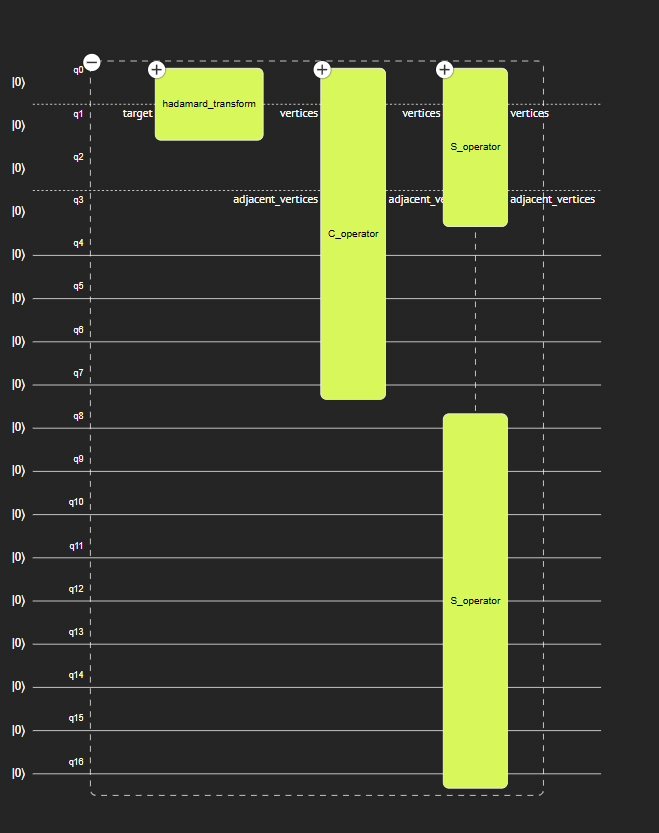

The above are screenshots of the synthesized circuit in Classiq. We have first put the allocated qubits (representing the nodes) in equal superposition, so that all 4 nodes are equally probable of traversing to. Following which, the coin operator:

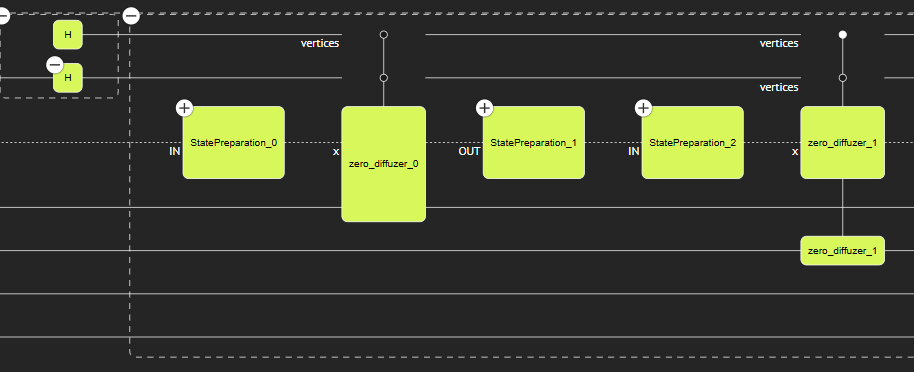

and the shift operator:

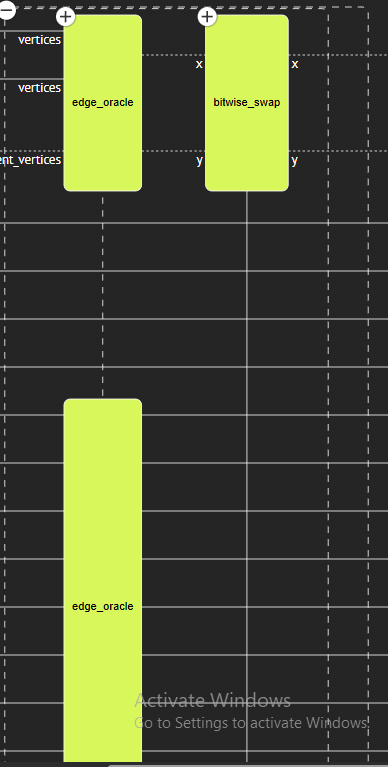

On execution,

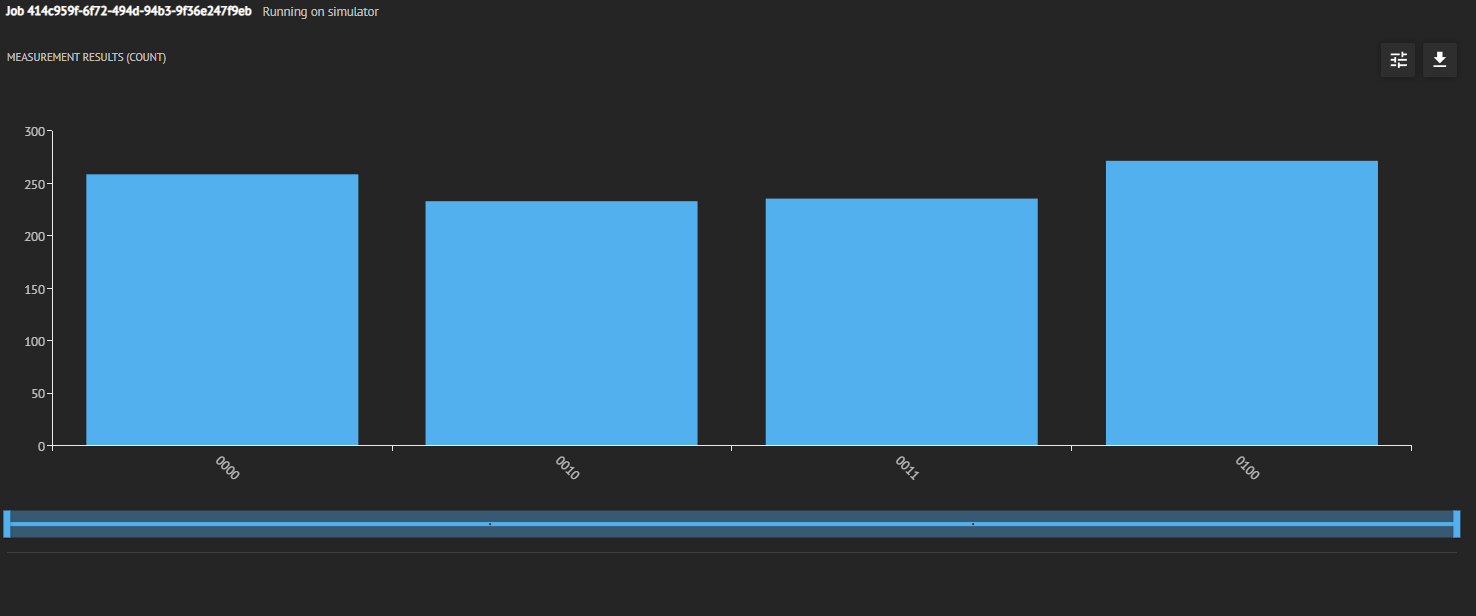

We can do the same for **16 nodes in a straight line** (actually for n number of nodes in a straight line! We are only limited by the hardware) ll we have to do is change the `number of nodes` and `size` 
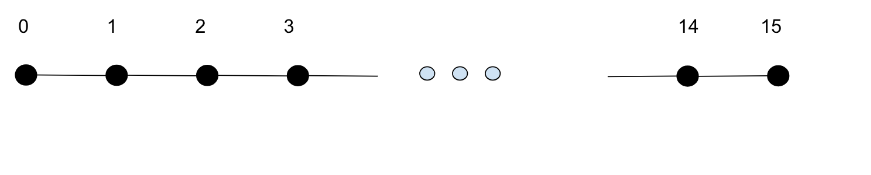

In [8]:
#Case of 4 nodes in a straight line

from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences


#The number of qubits or quantum states involved in the quantum walk.
size = 4 #log_2(16) = 4
#We're using 2 qubits, each qubit can be in one of 2 states (0 or 1)
number_of_nodes = 2**size 

# State preparation: |-> 
@qfunc
def prepare_minus(x: QBit):
    #By preparing qubits in |-> state, we create 
    #an equal-weighted superposition of both (|0>) and (|1>). 
    #In quantum walks, superposition allows 
    #the quantum particle (represented by the qubit) to explore multiple paths simultaneously.
    #The initial superposition helps distribute the particle’s probability 
    #across different nodes (vertices) in the graph
    X(x)
    H(x)
    

@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    
    #In quantum walks, the diffuser oracle plays a role similar to the Grover oracle.
    #It amplifies the probability amplitude of the target state (or vertex) while preserving the overall superposition.
    #By iteratively applying the diffuser, the quantum particle accumulates probability on the marked vertex as it "walks"
    """Args:
        aux (Output[QNum]): Auxiliary qubit we introduce to enlarge the Hilbert space
        x (QNum): The vertex to be checked
    """
    aux^=(x!=0) #bitwise XOR. Modifies the value of aux based on whether x is nonzero.
    #If x is nonzero, the phase of the |1> component of aux is inverted (similar to phase kickback).

@qfunc
def zero_diffuzer(x: QNum):
    #Quantum walks involve exploring a graph or state space to find specific targets (e.g., marked vertices).
    #The diffuser oracle amplifies the probability amplitude of the target states 
    #while suppressing other states by introducing phase changes, essential for constructive interference during the walk.
    
    
    """
    Args:
        x (QNum): QNum - current node (or vertex) in the quantum walk.
    """
    aux = QNum('aux') #auxiliary qubit allows for conditional operations. 
    #By modifying the phase of the auxiliary qubit, we influence the overall quantum state with phase kickback
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

def C_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    # The coin operation adjusts the probability distribution for the next step based on the current node index.
    #
    """
    Args:
        i (int) - Current node
        vertices (QNum): QNum - vertices
        adjacent_vertices (QNum) - adjacent vertices
    """
    prob = [0]*number_of_nodes  
    if i == 0:
        prob[i + 1] = 1.0  # state - 0 / first node can move only to the right! 
    elif i == number_of_nodes - 1:
        prob[i - 1] = 1.0  # last node can only move to the left!
    else:
        prob[i - 1] = 0.5  # For intermediate nodes (neither the first nor the last), 
        prob[i + 1] = 0.5  # the probability vector assigns equal probabilities to moving left and right.
    print(f'State={i}, prob vec ={prob}') #showing how the probabilities are distributed among adjacent vertices.
    control(ctrl=vertices==i, #checks whether the quantum particle (represented by the vertices qubit) is currently at node i.
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices), #prepares the state of the adjacent vertices (adjacent_vertices) based on the probabilities defined
              action= lambda: zero_diffuzer(adjacent_vertices))) 

@qfunc 
def C_operator(vertices:QNum, adjacent_vertices: QNum):
    #The Coin Operator
    for i in range(number_of_nodes):
        C_iteration(i,vertices,adjacent_vertices)


@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    #An oracle to check for adjacent vertices, we define it this way because our nodes are present in a straight line
    """
    Args:
        res (Output[QBit]) - result after checking if vertices are adjacent
    """
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1)) #bitwise OR again,
    #If either of the comparisons evaluates to True, the corresponding bit in res is set to 1.

@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    #Ensures that the walker (the quantum particle) can move between adjacent nodes by swapping states
    """
    Args:
        x (QArray[QBit]): First QArray of qubits.
        y (QArray[QBit]): Second QArray of qubits.
    """
    repeat(count= x.len,
           iteration= lambda i: SWAP(x[i],y[i])) 

@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    #The shift operator. 
    #If the particle is at node (i), the shift operator swaps the states of nodes (i) and (i+1) since we have a one-dimensional graph
    #This swap corresponds to moving one step to the right (or left
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1, #if res = 1, swap
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))
    
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    allocate(size, vertices)  # vertices' qubits
    hadamard_transform(vertices)  # vertices are acted upon by the Hadamard transform for superposition
    allocate(size, adjacent_vertices)  # adjacent vertices' qubits
    
    C_operator(vertices, adjacent_vertices)  # coin operator
    S_operator(vertices, adjacent_vertices)  # shift operator

# We can now create, synthesize our quantum model for 16 nodes in a line
qmod_16 = create_model(main)
qprog_16 = synthesize(qmod_16)
show(qprog_16)

State=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0

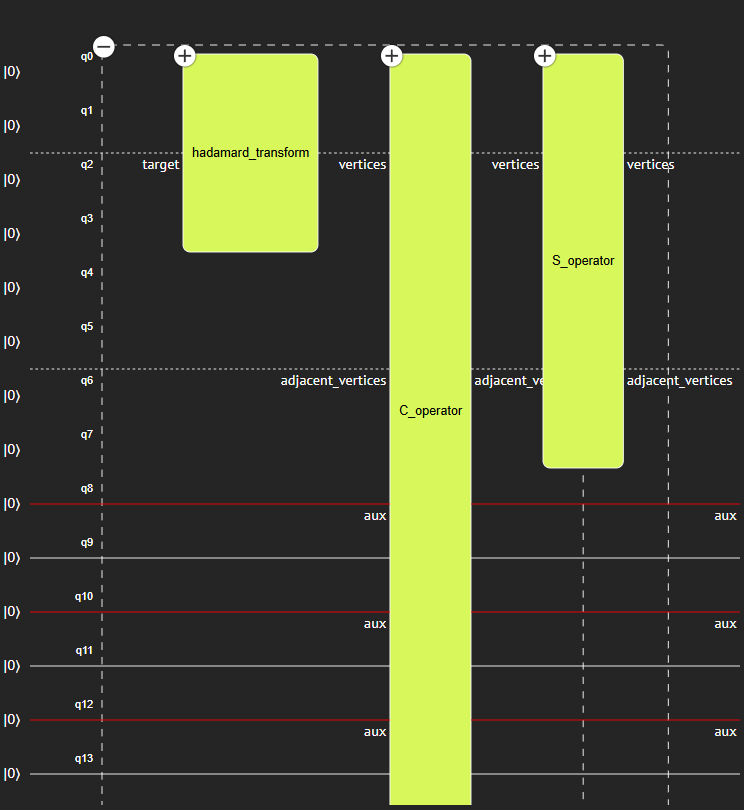

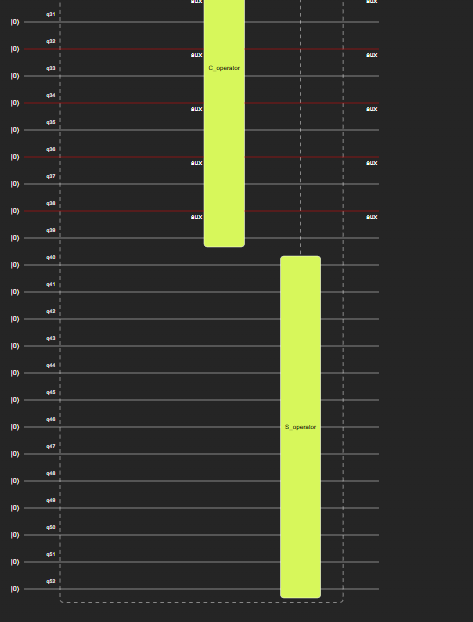

The C operator: 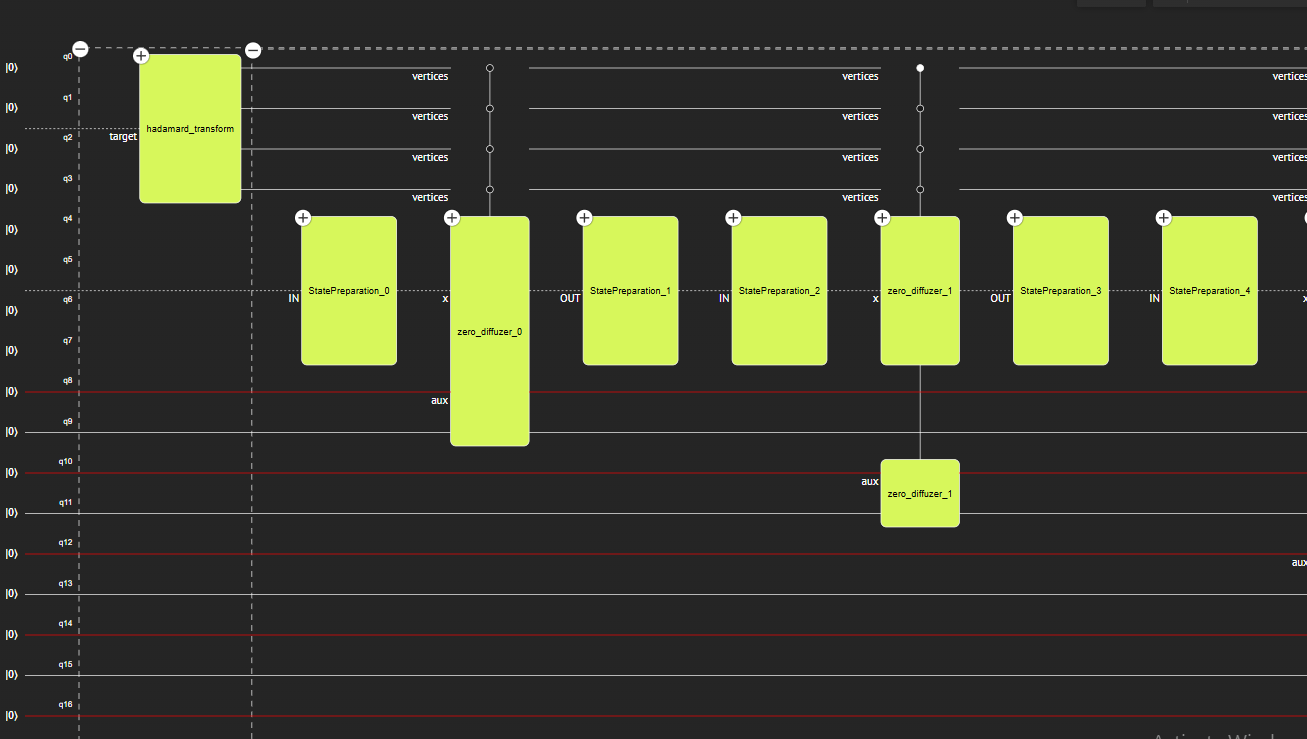

The S operator: 
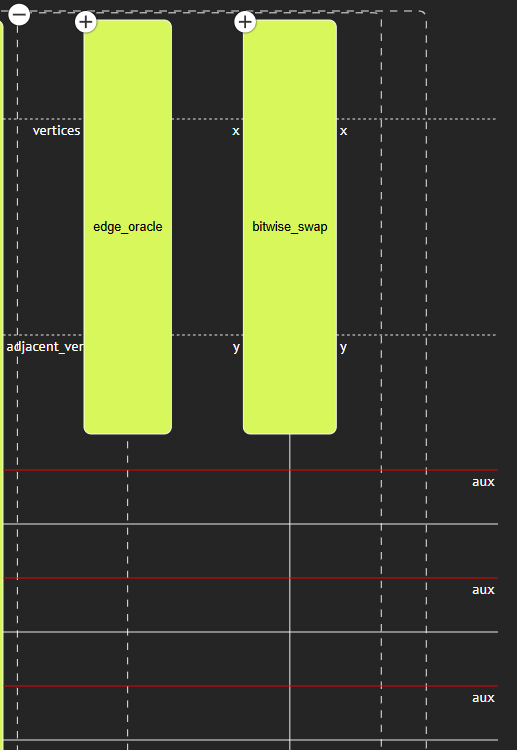 
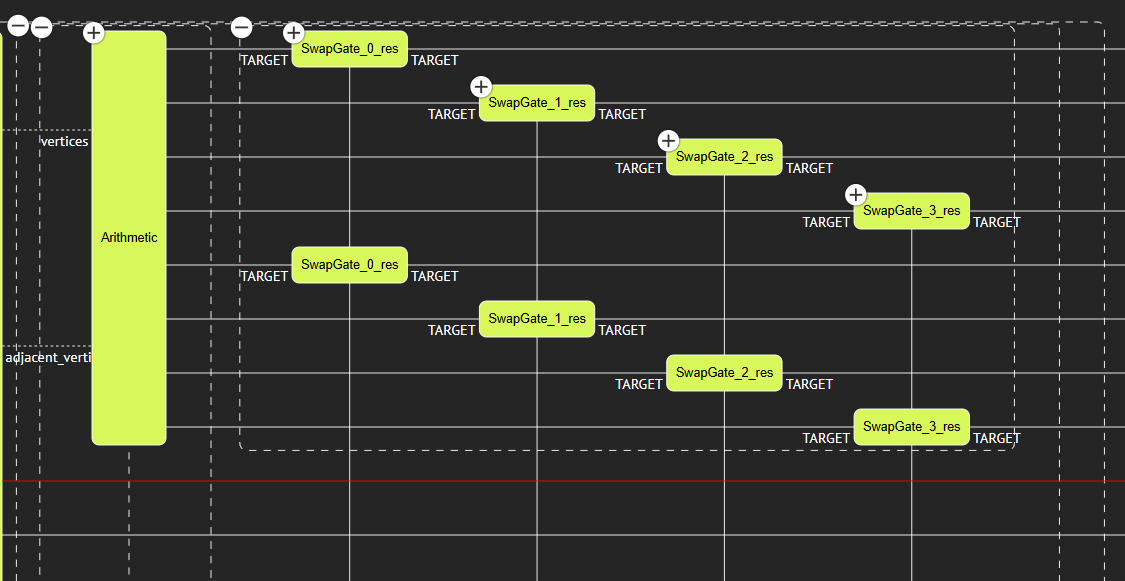

What if we optimized for width so that we won't have the 25 qubits restriction imposed? This is what we have at present: 
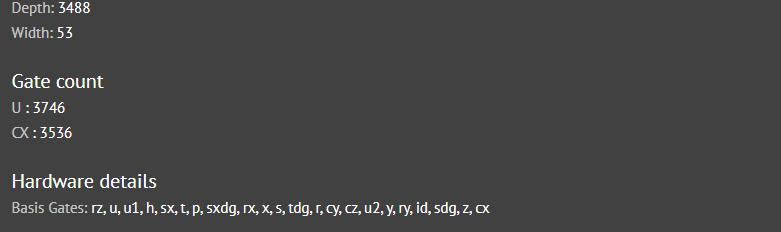


In [14]:
# qmod_16_width = create_model(main)
# qmod_16_constraint_width = set_constraints(
#     qmod_16_width, Constraints(optimization_parameter="width")
# )
# qprog_16_width = synthesize(qmod_16_constraint_width)
# show(qprog_16_width)

State=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0

ClassiqAPIError: Error number 73901 occurred. Synthesis process reached timeout. Please try specifying a longer timeout in the synthesis preferences. Task that timed out: generation

Error identifier: EC9CDBE77-25E9-4F4D-84CE-7F65B4A33E28.
If you need further assistance, please reach out on our Community Slack channel at: https://short.classiq.io/join-slack
If the error persists feel free to open a ticket at: https://short.classiq.io/support